In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.shape
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#Get the numerical variables from our dataset.
numerical = customer_df.select_dtypes(include=[np.number]).astype(int)
numerical.head(5)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763,56274,69,32,5,0,1,384
1,6979,0,94,13,42,0,8,1131
2,12887,48767,108,18,38,0,2,566
3,7645,0,106,18,65,0,7,529
4,2813,43836,73,12,44,0,1,138


In [4]:
mean = numerical.mean(axis=0).astype(int)
mean

Customer Lifetime Value           8004
Income                           37657
Monthly Premium Auto                93
Months Since Last Claim             15
Months Since Policy Inception       48
Number of Open Complaints            0
Number of Policies                   2
Total Claim Amount                 433
dtype: int64

In [5]:
sd = numerical.std(axis = 0).astype(int)
sd 

Customer Lifetime Value           6870
Income                           30379
Monthly Premium Auto                34
Months Since Last Claim             10
Months Since Policy Inception       27
Number of Open Complaints            0
Number of Policies                   2
Total Claim Amount                 290
dtype: int64

(array([  1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   4.,
          3.,   2.,   9.,   9.,  13.,   7.,   9.,   8.,  16.,  23.,  23.,
         43.,  30.,  36.,  36.,  54.,  77.,  71.,  86.,  90., 102., 125.,
        115., 119., 158., 178., 212., 211., 255., 249., 239., 284., 296.,
        280., 257., 285., 348., 315., 307., 322., 317., 298., 281., 290.,
        309., 281., 273., 241., 230., 228., 208., 199., 187., 158., 144.,
        134., 140., 102.,  95.,  89.,  82.,  75.,  34.,  40.,  49.,  42.,
         18.,  30.,  19.,  27.,  17.,  12.,   9.,   6.,   2.,   5.,   4.,
          4.,   6.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.]),
 array([-19479.5119696 , -18932.51478318, -18385.51759675, -17838.52041033,
        -17291.5232239 , -16744.52603748, -16197.52885105, -15650.53166463,
        -15103.5344782 , -14556.53729177, -14009.54010535, -13462.54291892,
        -12915.5457325 , -12368.54854607, -11821.55135965, -11274.55417322,
        -10727

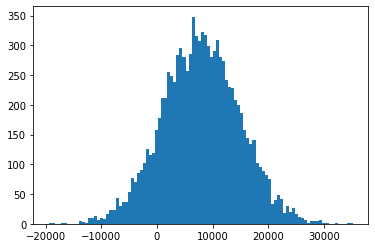

In [6]:
# checking normality for each column.
Value0 = np.random.normal(loc=mean[0],scale=sd[0], size=10000)
plt.hist(Value0,100)

(array([  2.,   3.,   4.,   7.,   1.,   5.,   8.,   8.,   8.,  11.,  20.,
         18.,  23.,  26.,  28.,  50.,  50.,  55.,  75.,  90., 104.,  96.,
         88., 104., 139., 169., 175., 189., 204., 231., 230., 258., 263.,
        282., 349., 293., 315., 323., 321., 321., 350., 343., 337., 320.,
        302., 298., 285., 280., 240., 240., 245., 214., 176., 178., 167.,
        163., 140., 109., 118.,  76.,  71.,  78.,  52.,  46.,  44.,  40.,
         22.,  28.,  22.,  12.,  18.,  11.,   6.,   3.,   2.,   7.,   2.,
          0.,   1.,   1.,   1.,   1.,   1.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-64760.64117754, -62212.36389333, -59664.08660911, -57115.80932489,
        -54567.53204067, -52019.25475645, -49470.97747223, -46922.70018801,
        -44374.42290379, -41826.14561957, -39277.86833535, -36729.59105114,
        -34181.31376692, -31633.0364827 , -29084.75919848, -26536.48191426,
        -23988

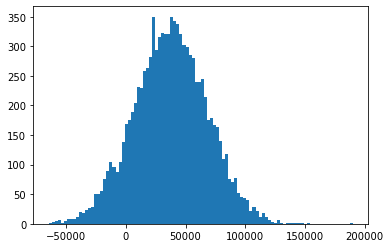

In [7]:
Value1 = np.random.normal(loc=mean[1],scale=sd[1], size=10000)
plt.hist(Value1,100)

(array([  1.,   1.,   0.,   0.,   0.,   0.,   3.,   1.,   2.,   5.,   8.,
          4.,   6.,   5.,  10.,  14.,  15.,  13.,  14.,  21.,  22.,  20.,
         33.,  38.,  33.,  61.,  58.,  76.,  76.,  97., 105., 132., 104.,
        140., 140., 150., 172., 201., 213., 209., 226., 237., 249., 270.,
        259., 260., 270., 274., 293., 295., 300., 299., 275., 311., 283.,
        252., 254., 258., 244., 237., 224., 215., 203., 185., 179., 170.,
        152., 144., 122., 104., 104.,  92.,  68.,  60.,  61.,  59.,  50.,
         45.,  34.,  36.,  31.,  21.,  13.,  20.,  15.,  14.,   3.,   2.,
          5.,   4.,   6.,   2.,   0.,   2.,   0.,   3.,   1.,   0.,   0.,
          2.]),
 array([-3.54787806e+01, -3.29362200e+01, -3.03936593e+01, -2.78510986e+01,
        -2.53085379e+01, -2.27659772e+01, -2.02234165e+01, -1.76808558e+01,
        -1.51382952e+01, -1.25957345e+01, -1.00531738e+01, -7.51061311e+00,
        -4.96805243e+00, -2.42549174e+00,  1.17068943e-01,  2.65962963e+00,
         5.202

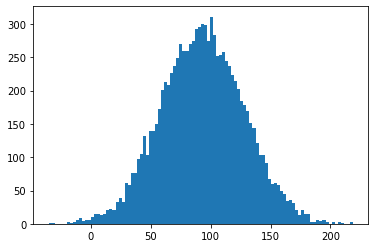

In [8]:
Value2 = np.random.normal(loc=mean[2],scale=sd[2], size=10000)
plt.hist(Value2,100)

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,   2.,   2.,   1.,
          4.,   2.,   7.,   9.,   4.,   8.,   6.,  17.,   7.,  15.,  16.,
         29.,  34.,  40.,  42.,  56.,  59.,  71.,  69.,  62., 108., 110.,
        130., 139., 138., 162., 176., 175., 208., 182., 235., 223., 275.,
        263., 269., 270., 306., 292., 274., 292., 269., 321., 311., 299.,
        332., 288., 261., 281., 272., 230., 240., 219., 184., 189., 159.,
        177., 128., 128., 124., 121.,  89.,  68.,  67.,  73.,  64.,  70.,
         38.,  39.,  27.,  21.,  26.,  20.,  13.,  10.,   9.,   8.,   6.,
          5.,   5.,   6.,   0.,   3.,   1.,   0.,   1.,   1.,   1.,   1.,
          1.]),
 array([-24.40014841, -23.63433395, -22.86851949, -22.10270503,
        -21.33689057, -20.57107611, -19.80526165, -19.03944719,
        -18.27363273, -17.50781827, -16.74200381, -15.97618935,
        -15.21037489, -14.44456043, -13.67874597, -12.91293151,
        -12.14711705, -11.38130259, -10.61548813,  -9.84967367

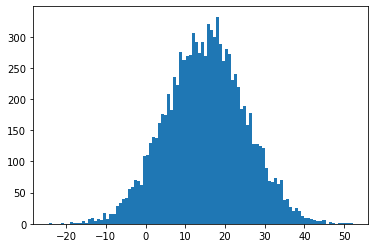

In [9]:
Value3 = np.random.normal(loc=mean[3],scale=sd[3], size=10000)
plt.hist(Value3,100)

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   1.,   4.,
          4.,   8.,   1.,   4.,   4.,   7.,  11.,  10.,  15.,  20.,  15.,
         28.,  18.,  32.,  39.,  42.,  47.,  58.,  72.,  94.,  76.,  99.,
        101., 102., 125., 144., 174., 190., 194., 216., 233., 232., 250.,
        247., 275., 285., 313., 313., 292., 293., 327., 310., 306., 285.,
        279., 300., 277., 287., 239., 257., 233., 216., 214., 183., 180.,
        175., 148., 152., 133., 116.,  92.,  93.,  73.,  58.,  70.,  44.,
         41.,  42.,  31.,  30.,  24.,  17.,  18.,  13.,   4.,   6.,   8.,
          5.,   5.,   6.,   2.,   2.,   3.,   1.,   2.,   0.,   0.,   0.,
          1.]),
 array([-6.03049755e+01, -5.82228407e+01, -5.61407060e+01, -5.40585712e+01,
        -5.19764364e+01, -4.98943016e+01, -4.78121668e+01, -4.57300321e+01,
        -4.36478973e+01, -4.15657625e+01, -3.94836277e+01, -3.74014929e+01,
        -3.53193582e+01, -3.32372234e+01, -3.11550886e+01, -2.90729538e+01,
        -2.699

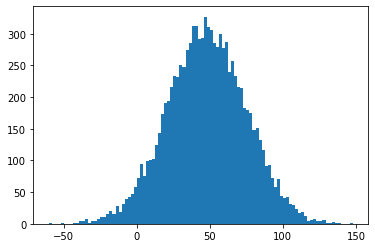

In [10]:

Value4 = np.random.normal(loc=mean[4],scale=sd[4], size=10000)
plt.hist(Value4,100)

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 10000.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
        -0.41, -0.4 , -

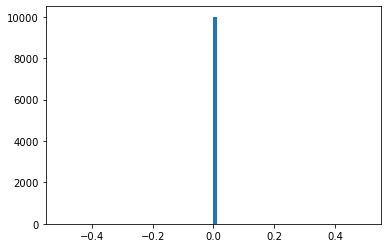

In [11]:
Value5 = np.random.normal(loc=mean[5],scale=sd[5], size=10000)
plt.hist(Value5,100)

(array([  2.,   0.,   1.,   0.,   0.,   4.,   3.,   7.,   2.,   1.,   4.,
          3.,   9.,  13.,   4.,   9.,  14.,  13.,  10.,  26.,  26.,  43.,
         20.,  52.,  52.,  53.,  59.,  69.,  84.,  78.,  99.,  95., 128.,
        137., 122., 159., 147., 177., 207., 204., 225., 237., 248., 240.,
        258., 257., 302., 316., 311., 318., 288., 299., 274., 277., 308.,
        241., 280., 262., 253., 246., 209., 211., 189., 180., 179., 156.,
        168., 133., 116., 119., 102.,  87.,  78.,  61.,  61.,  44.,  47.,
         50.,  30.,  26.,  33.,  23.,  27.,  20.,  13.,  15.,   6.,  11.,
          4.,  10.,   2.,   2.,   3.,   0.,   3.,   0.,   1.,   2.,   1.,
          2.]),
 array([-5.4292879 , -5.28295159, -5.13661529, -4.99027899, -4.84394269,
        -4.69760638, -4.55127008, -4.40493378, -4.25859748, -4.11226117,
        -3.96592487, -3.81958857, -3.67325227, -3.52691596, -3.38057966,
        -3.23424336, -3.08790706, -2.94157075, -2.79523445, -2.64889815,
        -2.50256184, -2.35

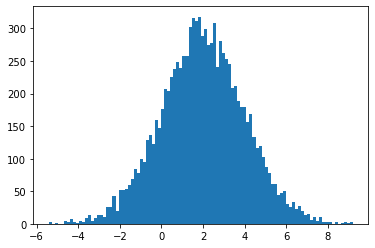

In [12]:
Value6 = np.random.normal(loc=mean[6],scale=sd[6], size=10000)
plt.hist(Value6,100)

(array([  1.,   0.,   1.,   0.,   2.,   3.,   2.,   2.,   2.,   0.,   1.,
          4.,   2.,   5.,   9.,   7.,  13.,  12.,  10.,  22.,  27.,  27.,
         29.,  35.,  44.,  50.,  47.,  64.,  81.,  92.,  99., 104., 132.,
        135., 154., 170., 185., 206., 212., 232., 265., 256., 242., 282.,
        261., 313., 319., 336., 289., 313., 296., 306., 304., 300., 267.,
        290., 250., 287., 258., 249., 218., 199., 170., 167., 179., 155.,
        132.,  96., 103., 100.,  94.,  79.,  50.,  47.,  45.,  46.,  31.,
         34.,  32.,  16.,  15.,  15.,  12.,  16.,   8.,   3.,   7.,   6.,
          4.,   6.,   3.,   0.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-694.04880927, -671.44528926, -648.84176924, -626.23824922,
        -603.63472921, -581.03120919, -558.42768917, -535.82416915,
        -513.22064914, -490.61712912, -468.0136091 , -445.41008909,
        -422.80656907, -400.20304905, -377.59952904, -354.99600902,
        -332.392489  , -309.78896899, -287.185

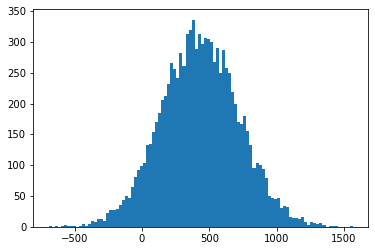

In [13]:
Value7 = np.random.normal(loc=mean[7],scale=sd[7], size=10000)
plt.hist(Value7,100)

In [ ]:
#Number of Open Complaints are not normal.we should transform in to that.

In [61]:
numerical['Number of Open Complaints']=np.log(numerical['Number of Open Complaints'])

In [62]:
numerical['Number of Open Complaints']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
9129         NaN
9130         NaN
9131    1.098612
9132         NaN
9133         NaN
Name: Number of Open Complaints, Length: 9134, dtype: float64